In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
import matplotlib.pyplot as plt

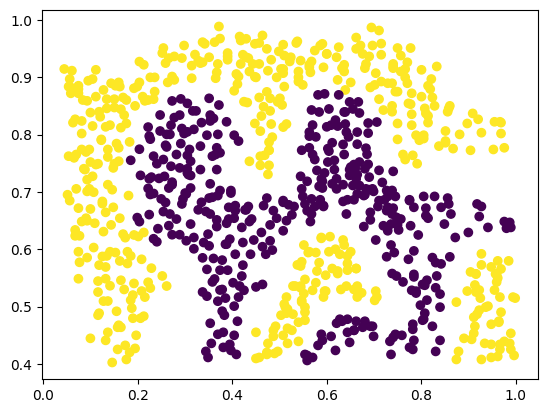

In [2]:
fileName = 'data1.mat'
data_base = loadmat(fileName)
plt.scatter(data_base["X"][:,0],data_base["X"][:,1],c=data_base['y'])
data_train,data_test = train_test_split(np.hstack((data_base['X'],data_base['y'])),test_size=0.3,random_state=True)

In [25]:
criterions = ['gini','entropy']
n_estimators_array = np.arange(1,20,step = 1)
max_depth_array = np.arange(5,10,step = 1)
min_samples_split_array = np.arange(2,5,step = 1)
gini_score = []
entropy_score = []

def get_parameter_scores(criterion = 'gini'):
    gini_score = []
    for i in n_estimators_array:
        for j in max_depth_array:
            for k in min_samples_split_array:
                clf = RandomForestClassifier(n_estimators = i,criterion = criterion,max_depth = j,min_samples_split = k)
                clf.fit(data_train[:,:2],data_train[:,2])
                score = clf.score(data_test[:,:2],data_test[:,2])
                if criterion == 'gini':
                    gini_score.append([i,j,k,score])
                else:
                    entropy_score.append([i,j,k,score])
    if criterion == 'gini':
        return gini_score
    else:
        return entropy_score
result1 = get_parameter_scores(criterion=criterions[0])
result2 = get_parameter_scores(criterion=criterions[1])

In [26]:
result1 = np.array(result1)
result2 = np.array(result2)
coord = np.where(result[:,3] == np.max(result[:,3]))
coord2 = np.where(result2[:,3] == np.max(result2[:,3]))

In [29]:
result[coord],result2[coord2]

(array([[12.        ,  9.        ,  3.        ,  0.98841699]]),
 array([[14.        ,  9.        ,  2.        ,  0.98455598],
        [16.        ,  9.        ,  2.        ,  0.98455598],
        [17.        ,  8.        ,  3.        ,  0.98455598],
        [18.        ,  8.        ,  3.        ,  0.98455598],
        [18.        ,  9.        ,  2.        ,  0.98455598],
        [18.        ,  9.        ,  3.        ,  0.98455598]]))

In [37]:
def get_parameter_scores(criterion = 'gini'):
    result = []
    for i in min_samples_split_array:
        clf = RandomForestClassifier(n_estimators = 12,criterion = criterion,max_depth = 9,min_samples_split = i)
        clf.fit(data_train[:,:2],data_train[:,2])
        score = clf.score(data_test[:,:2],data_test[:,2])
        result.append([i,score])
    return result

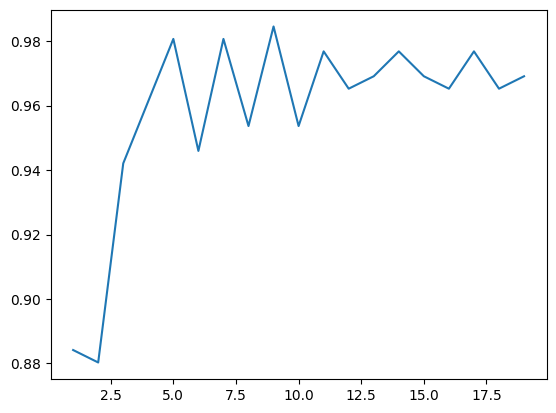

In [34]:
n_estimators_efficent = get_parameter_scores()
n_estimators_efficent = np.array(n_estimators_efficent)
plt.plot(n_estimators_efficent[:,0],n_estimators_efficent[:,1])

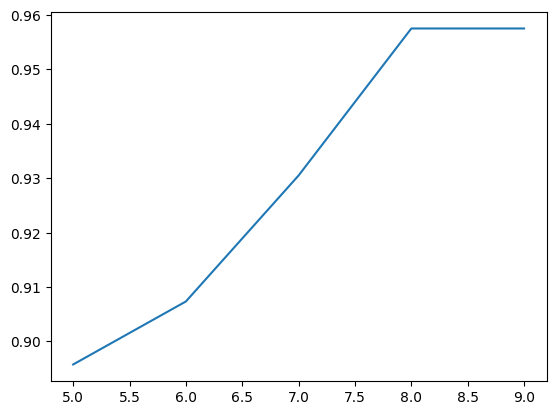

In [36]:
max_depth_efficent = get_parameter_scores()
max_depth_efficent = np.array(max_depth_efficent)
plt.plot(max_depth_efficent[:,0],max_depth_efficent[:,1])

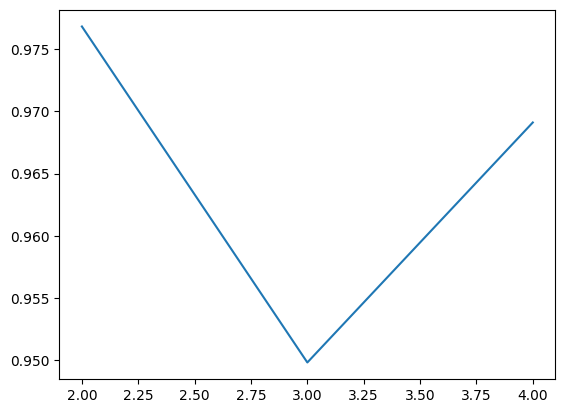

In [38]:
min_samples_split_efficent = get_parameter_scores()
min_samples_split_efficent = np.array(min_samples_split_efficent)
plt.plot(min_samples_split_efficent[:,0],min_samples_split_efficent[:,1])

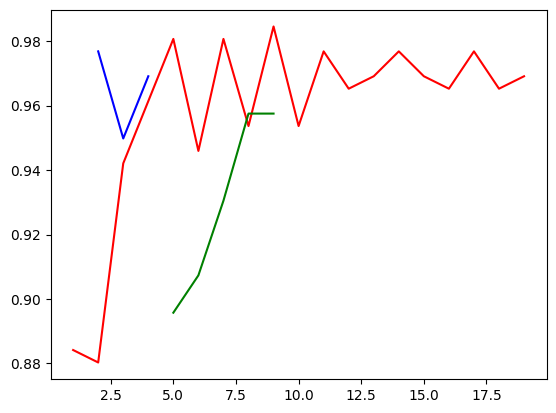

In [39]:
plt.plot(n_estimators_efficent[:,0],n_estimators_efficent[:,1],c = 'r')
plt.plot(max_depth_efficent[:,0],max_depth_efficent[:,1],c='g')
plt.plot(min_samples_split_efficent[:,0],min_samples_split_efficent[:,1],c='b')

In [9]:
criterions = ['gini','entropy']
n_estimators_array = np.arange(2,20,step = 1)
max_depth_array = np.arange(2,20,step = 1)
min_samples_split_array = np.arange(2,20,step = 1)
gini_score = []
entropy_score = []

def get_parameter_scores(criterion = 'gini'):
    gini_score = []
    for i in n_estimators_array:
        for j in max_depth_array:
            for k in min_samples_split_array:
                clf = RandomForestClassifier(n_estimators = i,criterion = criterion,max_depth = j,min_samples_split = k)
                clf.fit(data_train[:,:2],data_train[:,2])
                score = clf.score(data_test[:,:2],data_test[:,2])
                if criterion == 'gini':
                    gini_score.append([i,j,k,score])
                else:
                    entropy_score.append([i,j,k,score])
                print("now this parameter is working:n_estimators = {},max_depth = {},min_samples_split = {}".format(i,j,k))
    if criterion == 'gini':
        return gini_score
    else:
        return entropy_score
result1 = get_parameter_scores(criterion=criterions[0])
result2 = get_parameter_scores(criterion=criterions[1])

now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 10
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 13


now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 12
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 13
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 14
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 15
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 16
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 17
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 18
now this parameter is working:n_estimators = 2,max_depth = 10,min_samples_split = 19
now this parameter is working:n_estimators = 2,max_depth = 11,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 11,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 11,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 11,min_sa

now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples

now this parameter is working:n_estimators = 3,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 2
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 3
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 4
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 5
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 8

now this parameter is working:n_estimators = 3,max_depth = 13,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 13,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 13,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 13,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 3,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 3,max_depth = 14,min_sample

now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 14

now this parameter is working:n_estimators = 4,max_depth = 9,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 10,min_samples_s

now this parameter is working:n_estimators = 4,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples

now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split =

now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 12,min_sa

now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 18,min_sam

now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split

now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 13,min_

now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 19,min_samp

now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 8,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 8,min_samples_spli

now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 14,min_

now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 19,min_sa

now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 14

now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 8,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 8,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 13,min_sam

now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 8,max_depth = 19,min_sa

now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 2
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 3
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 4
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 5
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 8
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 9


now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 9,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 9,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 9,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 9,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 9,max_depth = 14,min_samp

now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 2,min_sample

now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 7,min_s

now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 13

now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth

now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 6,min_samples

now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 11,max_depth

now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 11,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 11,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 11,max_dept

now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 17
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 18
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 19
now this parameter is working:n_estimators = 12,max_depth = 7,min_samples_split = 2
now this parameter is working:n_estimators = 12,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 12,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 7,min_sampl

now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 12,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 12,max_dep

now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 12,max_depth

now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 6,min_sample

now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_dept

now this parameter is working:n_estimators = 13,max_depth = 16,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 13,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 17

now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth = 4,min_sa

now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 18
now this parameter is working:n_estimators = 14,max_dept

now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 16,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth

now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 11
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 13
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 15,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 4,min_samp

now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 13
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 14
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 10,mi

now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 8
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 9
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth =

now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 3,min_sa

now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 9
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 10
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples

now this parameter is working:n_estimators = 16,max_depth = 13,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 13,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 13,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 13,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 1

now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 

now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 8,min_

now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 1

now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth

now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 14
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth = 6,min_sam

now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth 

now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth =

now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 6,min_sampl

now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 4
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 12

now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_dept

now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 14

now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 9
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 18
now this parameter is working:n_estimators = 2,max_depth = 15,min_samples_split = 19
now this parameter is working:n_estimators = 2,max_depth = 16,min_

now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_split = 2
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_split = 3
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_split = 4
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_split = 5
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_split = 6
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_split = 

now this parameter is working:n_estimators = 3,max_depth = 10,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 10,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 10,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 10,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 10,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 11,min_samples_split = 2
now this parameter is working:n_estimators = 3,max_depth = 11,min_samples_split = 3
now this parameter is working:n_estimators = 3,max_depth = 11,min_samples_split = 4
now this parameter is working:n_estimators = 3,max_depth = 11,min_samples_split = 5
now this parameter is working:n_estimators = 3,max_depth = 11,min_samples_split = 6
now this parameter is working:n_estimators = 3,max_depth = 11,min_samples_split = 7
now this parameter is working:n_estimators = 3,max_depth = 11,min_sampl

now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 3,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 3,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 3,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 3,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 3,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 3,max_depth = 17,min_sampl

now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 4,min_samples_split

now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 12,min_

now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 19,min_s

now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 6,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 5,max_depth = 7,min_samples_split = 10


now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 5,max_depth = 13,min_sampl

now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 19,min_s

now this parameter is working:n_estimators = 6,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 12


now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 13,min_

now this parameter is working:n_estimators = 6,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples

now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split =

now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 8
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 9
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples

now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 7,max_depth = 19,min_s

now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 6,min_samples_split = 14

now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 8,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 8,max_depth = 13,min_

now this parameter is working:n_estimators = 8,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 19,min_samples

now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_spli

now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 8
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 9
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 10
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 12
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 13,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 13,min_sa

now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 19,min_sampl

now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 7,min_samples

now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_dep

now this parameter is working:n_estimators = 10,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 18

now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 11,max_depth = 5,min_sa

now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 3
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 4
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 1

now this parameter is working:n_estimators = 11,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 17,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 17

now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 17
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 18
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 19
now this parameter is working:n_estimators = 12,max_depth = 5,min_samples_split = 2
now this parameter is working:n_estimators = 12,max_depth = 5,min_samples_split = 3
now this parameter is working:n_estimators = 12,max_depth = 5,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 5,min_sa

now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 

now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 18
now this parameter is working:n_estimators = 12,max_depth = 15,min_samples_split = 19
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 2
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 3
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth 

now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 3,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 3,min_sample

now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 14
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 16
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 18
now this parameter is working:n_estimators = 13,max_depth = 8,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 9,min_

now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 14
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 15
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 16
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 18
now this parameter is working:n_estimators = 13,max_depth = 14,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_dep

now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 14,max_depth = 2,min_s

now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 5
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 8,min_samp

now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 

now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 14,max_depth = 19,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth 

now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 15,max_depth = 7,min_samples

now this parameter is working:n_estimators = 15,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 8
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 9
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 10
now this parameter is working:n_estimators = 15,max_depth = 13,min_samples_split = 11
now this parameter is working:n_estimators = 15,max_depth = 13

now this parameter is working:n_estimators = 15,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 

now this parameter is working:n_estimators = 16,max_depth = 6,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 6,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 6,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 6,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 7,min_sample

now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth =

now this parameter is working:n_estimators = 16,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 

now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 5,min_sa

now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth 

now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth =

now this parameter is working:n_estimators = 18,max_depth = 4,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples

now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 13
now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 14
now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 17
now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 18
now this parameter is working:n_estimators = 18,max_depth = 10,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth 

now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 11
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 12
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 13
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 14
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 16,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth 

now this parameter is working:n_estimators = 19,max_depth = 3,min_samples_split = 16
now this parameter is working:n_estimators = 19,max_depth = 3,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 3,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 3,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 4
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 4,min_sample

now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 9,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth = 9,min_samp

now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 16
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 14,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 15,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 15,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_depth = 15,min_samples_split = 4
now this parameter is working:n_estimators = 19,max_depth

now this parameter is working:n_estimators = 19,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 19,min_samples_split = 19


In [10]:
result1 = np.array(result1)
result2 = np.array(result2)
coord = np.where(result1[:,3] == np.max(result1[:,3]))
coord2 = np.where(result2[:,3] == np.max(result2[:,3]))
result1[coord],result2[coord2]

(array([[14.        , 15.        ,  4.        ,  0.99227799]]),
 array([[ 8.        , 14.        , 10.        ,  0.99227799],
        [12.        , 19.        , 19.        ,  0.99227799],
        [13.        , 10.        ,  4.        ,  0.99227799],
        [13.        , 13.        ,  5.        ,  0.99227799],
        [13.        , 18.        ,  6.        ,  0.99227799],
        [17.        , 14.        ,  2.        ,  0.99227799],
        [19.        , 14.        ,  5.        ,  0.99227799]]))

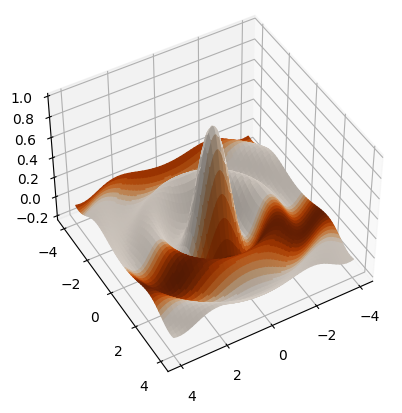

In [15]:
from matplotlib import cm

x = y = np.arange(-4.0, 4.0, 0.02)

X, Y = np.meshgrid(x, y)

Z = np.sinc(np.sqrt(X*X+Y*Y))

# this is the value to use for the color

V = np.sin(Y)

# create the figure, add a 3d axis, set the viewing angle

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.view_init(45,60)

# here we create the surface plot, but pass V through a colormap

# to create a different color for each patch

ax.plot_surface(X, Y, Z, facecolors=cm.Oranges(V))